Warm up
=======
**Times series course**  
IMT Mines ALES  
2IA - 2022



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read time series data frame

Download the Air Passenger data.  
What is the purpose of the arguments (header, parse_dates, etc.) of the `pd.read_csv` function in the following cell?

In [33]:
# Find the good arguments to read the .csv file 
df = pd.read_csv('./AirPassengers.csv', header = 0, parse_dates = True, names = ['Month', 'Passengers'])
df


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [36]:
df["Month"]

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

Print the number of air passengers between 1949-01-05 and 1950-03-17.

In [43]:
df[(df["Month"] >= "1949-01") & (df["Month"] <= "1950-03")].count()

Month         15
Passengers    15
dtype: int64

## Visualize data

Plot the data with the pandas `plot` function.

<AxesSubplot: >

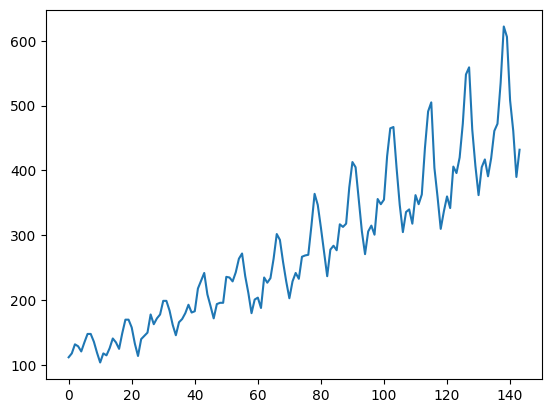

In [44]:
df["Passengers"].plot()

How to get the values of passenger number and time as numpy arrays?  
Plot these values with `matplotlib`.

What is the data type of these values?

## Manipulate time

### Native Python dates and times
Python's basic objects for working with dates and times reside in the built-in `datetime` module. Along with the third-party `dateutil` module, you can use it to quickly perform a host of useful functionalities on dates and times.

Use `datetime` to manually build a date (from year, month and day number). Print its type.

Use `dateutil` to parse the following date: "20th of March, 2023"

### Typed arrays of times with numpy
The weaknesses of Python's `datetime` format inspired the NumPy team to add a set of native time series data type to NumPy. The `datetime64` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format.

In [ ]:
# With numpy and datetime

from datetime import timedelta, datetime

date = np.array('2015-07-04', dtype=np.datetime64)
print("date: ", date)


t = np.arange(datetime(1985,7,1), datetime(2015,7,1), timedelta(days=1))
print("t: ", t)

# Conversion from numpy datetime64 to python datetime
print("Conversion to datetime: ", t.astype(datetime))


In [ ]:
# force a nanosecond-based time
np.datetime64('2015-07-04 12:59:59.50', 'ns')

Check with `numpy` if today is a business days

### Dates and times in pandas: best of both worlds
Pandas builds upon all the tools just discussed to provide a `Timestamp` object, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`. From a group of these `Timestamp` objects, Pandas can construct a `DatetimeIndex` that can be used to index data in a Series or `DataFrame`.

In [ ]:
date = pd.to_datetime("4th of July, 2015")
print(date)
print(type(date))


Is '7/1/2016' in January or July?

Which of these formats DON'T work?
- '2016 Jul 1'
- '7/1/2016'
- '1/7/2016'
- 'July 1, 2016'
- '2016-07-01'
- '2016/07/01'


What is the difference between time stamps and time spans?

In [ ]:
# Range of dates

rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
rng

In [ ]:
# With frequency

pd.timedelta_range(0, periods=9, freq="2H30T")

In [ ]:
# Use business days

from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())


## Resampling, Shifting, and Windowing

For the following cells, you will use `Yahoo! Finance` that provide a set of time series data.     
You can install it with the following command:   
`pip install yfinance`

In [ ]:
import yfinance as yf

goog = yf.download('GOOG', start='2004-01-01', end='2023-01-01')
goog.head()



In [ ]:
# Closing price of the google stock
goog['Close'].plot()

What is the overall trend in Apple stock over the 2019-2020 period? How would you explain the main downward?

One common need for time series data is **resampling** at a higher or lower frequency. This can be done using the `resample()` method, or the much simpler `asfreq()` method. The primary difference between the two is that `resample()` is fundamentally a data aggregation, while `asfreq()` is fundamentally a data selection.

In [ ]:
# Resample the data at the end of business year (BA):

goog = goog['Close']

goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')

goog.asfreq('BA').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'], loc='upper left');





Verify that at each point, `resample` reports the average of the previous year, while `asfreq` reports the value at the end of the year.

## Data imputation

For up-sampling, `resample()` and `asfreq()` are largely equivalent, though `resample` has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. `asfreq()` accepts a method argument to specify how values are imputed. Here, we will `resample` the business day data at a daily frequency (i.e., including weekends):

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Time-shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: `shift()` and `tshift()`.  

In short, the difference between them is that `shift()` shifts the data, while `tshift()` shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both `shift()` and `tshift()` by 900 days:

In [ ]:
ig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the `rolling()` attribute of Series and DataFrame objects.

This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

In [ ]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [48]:
#pseudo random numbers

random_array4 = np.random.seed()
random_array4